In [3]:
import json
import matplotlib.pyplot as plt

In [4]:
csu_len = []
csu_len2 = []
csu_files = ['/home/yuhuiz/Transformer/data/csu/csu_bpe_finegrained_train.tsv', '/home/yuhuiz/Transformer/data/csu/csu_bpe_finegrained_valid.tsv', '/home/yuhuiz/Transformer/data/csu/csu_bpe_finegrained_test.tsv']
for csu_file in csu_files:
    with open(csu_file) as f:
        for line in f:
            splitline = line.strip().split('\t')
            csu_len.append(len(splitline[0].split()))
            if len(splitline) != 1:
                csu_len2.append(len(splitline[1].split()))
            else:
                csu_len2.append(0)

In [5]:
pp_len = []
pp_len2 = []
pp_files = ['/home/yuhuiz/Transformer/data/pp/pp_bpe_finegrained_test.tsv']
for pp_file in pp_files:
    with open(pp_file) as f:
        for line in f:
            splitline = line.strip().split('\t')
            pp_len.append(len(splitline[0].split()))
            if len(splitline) != 1:
                pp_len2.append(len(splitline[1].split()))
            else:
                pp_len2.append(0)

In [6]:
sage_len = []
sage_files = ['/home/yuhuiz/Transformer/data/sage/sage/sage_ascii_train.tsv', '/home/yuhuiz/Transformer/data/sage/sage/sage_ascii_valid.tsv', '/home/yuhuiz/Transformer/data/sage/sage/sage_ascii_test.tsv']
for sage_file in sage_files:
    with open(sage_file) as f:
        for line in f:
            sage_len.append(len(line.split()))

In [7]:
print(max(csu_len))
print(max(pp_len))
print(max(sage_len))
print(max(pp_len2))
print(max(csu_len2))
print(max(pp_len2))

4080
1106
16131
107
180
107


In [8]:
print(len(csu_len))
print(len(pp_len))
print(len(sage_len))

112557
586
1019747


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


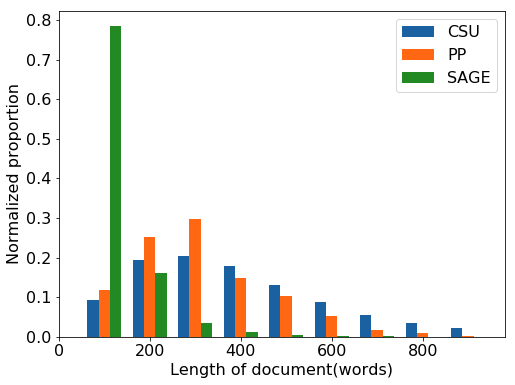

In [12]:
def generate_bins(r, values):
    # this function uses r as indices; values can be a python list
    np_values = np.array(values)
    counts = []
    prev_upper = 0.
    for upper in r:
        cnt = np.count_nonzero((np_values >= prev_upper) & (np_values <= upper))
        counts.append(cnt)
        prev_upper = upper
    return np.array(r), np.array(counts)

import numpy as np

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=16)
plt.rcParams["font.sans-serif"] = 'Arial'

csu_length_counts = generate_bins(range(100, 1000, 100), csu_len)
adobe_length_counts = generate_bins(range(100, 1000, 100), pp_len)
sage_length_counts = generate_bins(range(100, 1000, 100), sage_len)

ax1.bar(csu_length_counts[0] - 25, csu_length_counts[1].astype('float') / np.sum(csu_length_counts[1]), width=25, label='CSU', color='#1a61a1') # align='center'
ax1.bar(adobe_length_counts[0], adobe_length_counts[1].astype('float') / np.sum(adobe_length_counts[1]), width=25, label='PP', color='#ff6713')
ax1.bar(sage_length_counts[0] + 25, sage_length_counts[1].astype('float') / np.sum(sage_length_counts[1]), width=25, label='SAGE', color='#238a23')


ax1.legend(loc='upper right')
ax1.legend(loc="best", prop={'size': 16})  
ax1.set_ylabel('Normalized proportion')
ax1.set_xlabel('Length of document(words)')
ax1.set_xlim(xmin=0)



plt.show()

fig.savefig('doc-lengths-label-dist.pdf', format='pdf', bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


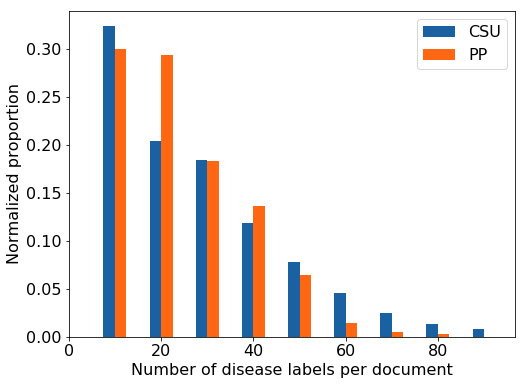

In [13]:
def generate_bins(r, values):
    # this function uses r as indices; values can be a python list
    np_values = np.array(values)
    counts = []
    prev_upper = 0.
    for upper in r:
        cnt = np.count_nonzero((np_values >= prev_upper) & (np_values <= upper))
        counts.append(cnt)
        prev_upper = upper
    return np.array(r), np.array(counts)

import numpy as np

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=16)
plt.rcParams["font.sans-serif"] = 'Arial'

csu_length_counts = generate_bins(range(10, 100, 10), csu_len2)
adobe_length_counts = generate_bins(range(10, 100, 10), pp_len2)


ax1.bar(csu_length_counts[0] - 1.25, csu_length_counts[1].astype('float') / np.sum(csu_length_counts[1]), width=2.5, label='CSU', color='#1a61a1') # align='center'
ax1.bar(adobe_length_counts[0] + 1.25, adobe_length_counts[1].astype('float') / np.sum(adobe_length_counts[1]), width=2.5, label='PP', color='#ff6713')


ax1.legend(loc='upper right')
ax1.legend(loc="best", prop={'size': 16})  
ax1.set_ylabel('Normalized proportion')
ax1.set_xlabel('Number of disease labels per document')
ax1.set_xlim(xmin=0)



plt.show()

fig.savefig('doc-lengths-label-dist.pdf', format='pdf', bbox_inches='tight')